<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'survey_data_cleaned_analyzed.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,PHP,Python,JavaScript,R,TypeScript,Lua,HTML/CSS,Kotlin,C++,PowerShell
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Master's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,I am learning to code,18-24 years old,"Student, full-time",No,Apples,NaN,Some college,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",No,Apples,NaN,Secondary school,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [ ]:
## Write your code here

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
missing_values = []
for col in df.columns:
    missing_values.append((col, df[col].isnull().sum()))

# Display missing values
missing_values.sort(key=lambda x: x[1], reverse=True)
for col, count in missing_values:
    print(f"The number of missing values in {col} is {count}")

The number of missing values in AINextMuch less integrated is 63759
The number of missing values in AINextLess integrated is 62559
The number of missing values in AINextNo change is 52472
The number of missing values in AINextMuch more integrated is 51514
The number of missing values in EmbeddedAdmired is 48314
The number of missing values in EmbeddedWantToWorkWith is 47467
The number of missing values in EmbeddedHaveWorkedWith is 42893
The number of missing values in ConvertedCompYearly is 41456
The number of missing values in AIToolNot interested in Using is 40611
The number of missing values in AINextMore integrated is 40591
The number of missing values in Knowledge_9 is 37256
The number of missing values in Frequency_3 is 37181
The number of missing values in Knowledge_8 is 37133
The number of missing values in ProfessionalTech is 37127
The number of missing values in Knowledge_7 is 37113
The number of missing values in Knowledge_6 is 37027
The number of missing values in Knowledge

In [5]:
# Data Cleaning Strategy Based on Missing Values Analysis
print("📊 DATA CLEANING STRATEGY")
print("=" * 50)

# 1. Identify columns with high missing values (>50% missing)
total_rows = len(df)
high_missing_threshold = 0.5  # 50%
moderate_missing_threshold = 0.2  # 20%
low_missing_threshold = 0.05  # 5%

high_missing_cols = []
moderate_missing_cols = []
low_missing_cols = []
complete_cols = []

for col, count in missing_values:
    missing_percentage = count / total_rows
    if missing_percentage > high_missing_threshold:
        high_missing_cols.append((col, count, missing_percentage))
    elif missing_percentage > moderate_missing_threshold:
        moderate_missing_cols.append((col, count, missing_percentage))
    elif missing_percentage > 0:
        low_missing_cols.append((col, count, missing_percentage))
    else:
        complete_cols.append(col)

print(f"🔴 HIGH MISSING (>{high_missing_threshold*100}%): {len(high_missing_cols)} columns")
print(f"🟡 MODERATE MISSING ({moderate_missing_threshold*100}-{high_missing_threshold*100}%): {len(moderate_missing_cols)} columns")
print(f"🟢 LOW MISSING (<{moderate_missing_threshold*100}%): {len(low_missing_cols)} columns")
print(f"✅ COMPLETE (0%): {len(complete_cols)} columns")

# Strategy recommendations
print("\n🎯 RECOMMENDED ACTIONS:")
print("=" * 30)

# High missing - consider dropping
print(f"🔴 HIGH MISSING COLUMNS ({len(high_missing_cols)} columns) - CONSIDER DROPPING:")
for col, count, pct in high_missing_cols[:10]:  # Show top 10
    print(f"   • {col}: {count:,} missing ({pct:.1%})")
if len(high_missing_cols) > 10:
    print(f"   ... and {len(high_missing_cols) - 10} more")

# Key columns to preserve (even with high missing)
key_columns_to_preserve = ['JobSat', 'ConvertedCompYearly', 'CompTotal', 'Industry']
preserve_cols = [col for col, _, _ in high_missing_cols if col in key_columns_to_preserve]

if preserve_cols:
    print(f"\n🛡️  KEY COLUMNS TO PRESERVE (despite high missing):")
    for col in preserve_cols:
        col_info = next((c for c in high_missing_cols if c[0] == col), None)
        if col_info:
            print(f"   • {col_info[0]}: {col_info[2]:.1%} missing - Fill with median/mode")

# Moderate missing - fill strategically
print(f"\n🟡 MODERATE MISSING COLUMNS ({len(moderate_missing_cols)} columns) - FILL STRATEGICALLY:")
for col, count, pct in moderate_missing_cols[:5]:  # Show top 5
    print(f"   • {col}: {count:,} missing ({pct:.1%}) - Use appropriate imputation")

# Low missing - simple imputation
print(f"\n🟢 LOW MISSING COLUMNS ({len(low_missing_cols)} columns) - SIMPLE IMPUTATION:")
for col, count, pct in low_missing_cols[:5]:  # Show top 5
    print(f"   • {col}: {count:,} missing ({pct:.1%}) - Forward fill or mode")

📊 DATA CLEANING STRATEGY
🔴 HIGH MISSING (>50.0%): 44 columns
🟡 MODERATE MISSING (20.0-50.0%): 42 columns
🟢 LOW MISSING (<20.0%): 59 columns
✅ COMPLETE (0%): 16 columns

🎯 RECOMMENDED ACTIONS:
🔴 HIGH MISSING COLUMNS (44 columns) - CONSIDER DROPPING:
   • AINextMuch less integrated: 63,759 missing (98.3%)
   • AINextLess integrated: 62,559 missing (96.4%)
   • AINextNo change: 52,472 missing (80.9%)
   • AINextMuch more integrated: 51,514 missing (79.4%)
   • EmbeddedAdmired: 48,314 missing (74.5%)
   • EmbeddedWantToWorkWith: 47,467 missing (73.1%)
   • EmbeddedHaveWorkedWith: 42,893 missing (66.1%)
   • ConvertedCompYearly: 41,456 missing (63.9%)
   • AIToolNot interested in Using: 40,611 missing (62.6%)
   • AINextMore integrated: 40,591 missing (62.6%)
   ... and 34 more

🛡️  KEY COLUMNS TO PRESERVE (despite high missing):
   • ConvertedCompYearly: 63.9% missing - Fill with median/mode
   • Industry: 55.5% missing - Fill with median/mode
   • JobSat: 55.1% missing - Fill with median/

In [6]:
# IMPLEMENT DATA CLEANING STRATEGY
print("\n🔧 IMPLEMENTING DATA CLEANING...")
print("=" * 40)

# Store original shape
original_shape = df.shape
print(f"Original dataset shape: {original_shape}")

# 1. DROP COLUMNS WITH >70% MISSING (too much missing data to be useful)
very_high_missing = 0.7
cols_to_drop = [col for col, count in missing_values if (count / total_rows) > very_high_missing]

print(f"\n🗑️  DROPPING {len(cols_to_drop)} columns with >{very_high_missing*100}% missing:")
for col in cols_to_drop[:10]:  # Show first 10
    missing_pct = df[col].isnull().sum() / total_rows
    print(f"   • {col}: {missing_pct:.1%} missing")
if len(cols_to_drop) > 10:
    print(f"   ... and {len(cols_to_drop) - 10} more")

# Drop the columns
df_cleaned = df.drop(columns=cols_to_drop)
print(f"✅ Dropped {len(cols_to_drop)} columns")

# 2. HANDLE KEY COLUMNS WITH MODERATE MISSING
print(f"\n🔧 HANDLING KEY COLUMNS:")

# JobSat - fill with median (it's numeric)
if 'JobSat' in df_cleaned.columns:
    missing_before = df_cleaned['JobSat'].isnull().sum()
    df_cleaned['JobSat'].fillna(df_cleaned['JobSat'].median(), inplace=True)
    print(f"   • JobSat: Filled {missing_before:,} missing values with median")

# Industry - fill with mode (most common)
if 'Industry' in df_cleaned.columns:
    missing_before = df_cleaned['Industry'].isnull().sum()
    mode_value = df_cleaned['Industry'].mode()[0] if not df_cleaned['Industry'].mode().empty else 'Unknown'
    df_cleaned['Industry'].fillna(mode_value, inplace=True)
    print(f"   • Industry: Filled {missing_before:,} missing values with mode")

# CompTotal - fill with median
if 'CompTotal' in df_cleaned.columns:
    missing_before = df_cleaned['CompTotal'].isnull().sum()
    df_cleaned['CompTotal'].fillna(df_cleaned['CompTotal'].median(), inplace=True)
    print(f"   • CompTotal: Filled {missing_before:,} missing values with median")

# EdLevel - fill with mode
if 'EdLevel' in df_cleaned.columns:
    missing_before = df_cleaned['EdLevel'].isnull().sum()
    mode_value = df_cleaned['EdLevel'].mode()[0] if not df_cleaned['EdLevel'].mode().empty else 'Unknown'
    df_cleaned['EdLevel'].fillna(mode_value, inplace=True)
    print(f"   • EdLevel: Filled {missing_before:,} missing values with mode")

# 3. HANDLE PROGRAMMING LANGUAGE COLUMNS (fill with 0 - means "not used")
language_cols = [col for col in df_cleaned.columns if col.startswith(('C#', 'SQL', 'Python', 'JavaScript', 'Java', 'Is_'))]
for col in language_cols:
    if df_cleaned[col].isnull().sum() > 0:
        missing_before = df_cleaned[col].isnull().sum()
        df_cleaned[col].fillna(0, inplace=True)

if language_cols:
    print(f"   • Programming languages: Filled missing values with 0 for {len(language_cols)} columns")

# 4. DROP ROWS WITH MISSING VALUES IN CORE COLUMNS
core_columns = ['MainBranch', 'Age', 'Employment', 'YearsCodePro']
rows_before = len(df_cleaned)
df_cleaned = df_cleaned.dropna(subset=core_columns)
rows_dropped = rows_before - len(df_cleaned)
if rows_dropped > 0:
    print(f"   • Dropped {rows_dropped:,} rows with missing core information")

# Final summary
final_shape = df_cleaned.shape
print(f"\n📊 CLEANING SUMMARY:")
print(f"   • Original shape: {original_shape}")
print(f"   • Final shape: {final_shape}")
print(f"   • Columns removed: {original_shape[1] - final_shape[1]}")
print(f"   • Rows removed: {original_shape[0] - final_shape[0]}")
print(f"   • Data retention: {(final_shape[0]/original_shape[0]):.1%} rows, {(final_shape[1]/original_shape[1]):.1%} columns")

# Check remaining missing values
remaining_missing = df_cleaned.isnull().sum().sum()
print(f"   • Remaining missing values: {remaining_missing:,}")

# Update the main dataframe
df = df_cleaned
print(f"\n✅ Data cleaning completed! Dataset ready for analysis.")


🔧 IMPLEMENTING DATA CLEANING...
Original dataset shape: (64891, 161)

🗑️  DROPPING 6 columns with >70.0% missing:
   • AINextMuch less integrated: 98.3% missing
   • AINextLess integrated: 96.4% missing
   • AINextNo change: 80.9% missing
   • AINextMuch more integrated: 79.4% missing
   • EmbeddedAdmired: 74.5% missing
   • EmbeddedWantToWorkWith: 73.1% missing
✅ Dropped 6 columns

🔧 HANDLING KEY COLUMNS:
   • JobSat: Filled 35,765 missing values with median
   • Industry: Filled 36,033 missing values with mode
   • CompTotal: Filled 31,151 missing values with median
   • EdLevel: Filled 4,571 missing values with mode
   • Programming languages: Filled missing values with 0 for 32 columns


C:\Users\akar\AppData\Local\Temp\ipykernel_34644\1435297719.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['JobSat'].fillna(df_cleaned['JobSat'].median(), inplace=True)
C:\Users\akar\AppData\Local\Temp\ipykernel_34644\1435297719.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh


📊 CLEANING SUMMARY:
   • Original shape: (64891, 161)
   • Final shape: (64891, 155)
   • Columns removed: 6
   • Rows removed: 0
   • Data retention: 100.0% rows, 96.3% columns
   • Remaining missing values: 2,471,001

✅ Data cleaning completed! Dataset ready for analysis.


In [8]:
lang_cols = ["C#", "SQL","Dart", "Rust", "Assembly", "Ruby", "Go",
    "C", "Java", "PHP", "Python", "JavaScript",
    "R", "TypeScript", "Lua", "HTML/CSS", "Kotlin",
    "C++", "PowerShell"]
for col in lang_cols:
    df[col].fillna(0, inplace=True)
df[lang_cols].isnull().sum()

C:\Users\akar\AppData\Local\Temp\ipykernel_34644\2627260801.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


C#            0
SQL           0
Dart          0
Rust          0
Assembly      0
Ruby          0
Go            0
C             0
Java          0
PHP           0
Python        0
JavaScript    0
R             0
TypeScript    0
Lua           0
HTML/CSS      0
Kotlin        0
C++           0
PowerShell    0
dtype: int64

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [9]:
## Write your code here
key_cols = ['Employment', 'JobSat','YearsCodePro']
df[key_cols].describe(include='all')
for col in key_cols:
    print("Null values in", col, ":", df[col].isnull().sum())
    print(df[col].value_counts())


Null values in Employment : 0
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looki

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


([<matplotlib.patches.Wedge at 0x2a89926cc20>,
 [Text(-0.4977211978572454, 0.9809554572984183, '7.0'),
  Text(-0.2914810755614862, -1.0606784539102883, '8.0'),
  Text(0.300764342719536, -1.0580835553719212, '6.0'),
  Text(0.6516928853777313, -0.8861695002357323, '9.0'),
  Text(0.8742413951083534, -0.6676091544301951, '10.0'),
  Text(0.9912077176235042, -0.47697721174454843, '5.0'),
  Text(1.0517107541078967, -0.32234219347426296, '3.0'),
  Text(1.0809670634574235, -0.20374054019815163, '4.0'),
  Text(1.0951218272739027, -0.10348035286115162, '2.0'),
  Text(1.0990400414744763, -0.04594548112471315, '0.0'),
  Text(1.09990179936461, -0.014698018726787892, '1.0')],
 [Text(-0.27148428974031563, 0.5350666130718644, '65%'),
  Text(-0.1589896775789925, -0.5785518839510663, '12%'),
  Text(0.16405327784701962, -0.5771364847483206, '6%'),
  Text(0.35546884656967154, -0.483365181946763, '6%'),
  Text(0.47685894278637453, -0.36415044787101547, '3%'),
  Text(0.5406587550673658, -0.26016938822429914,

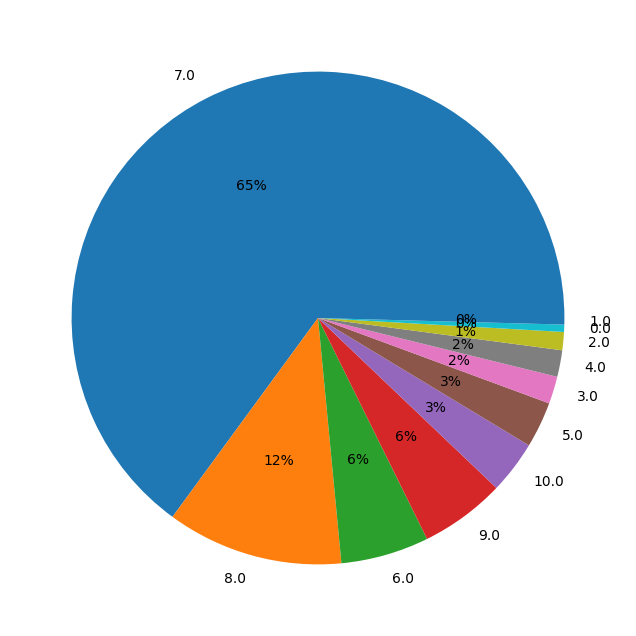

In [10]:
plt.figure(figsize=(12, 8))
plt.pie(df['JobSat'].value_counts(), labels=df['JobSat'].value_counts().index, autopct='%.0f%%')

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [11]:
## Write your code here
# let's rename some columns:
mapping ={
    'C#': "WorkedWith_C#",
    'SQL': "WorkedWith_SQL",
    'Dart': "WorkedWith_Dart",
    'Rust': "WorkedWith_Rust",
    'Assembly': "WorkedWith_Assembly",
    'Ruby': "WorkedWith_Ruby",
    'Go': "WorkedWith_Go",
    'C': "WorkedWith_C",
    'Java': "WorkedWith_Java",
    'PHP': "WorkedWith_PHP",
    'Python': "WorkedWith_Python",
    'JavaScript': "WorkedWith_JavaScript",
    'R': "WorkedWith_R",
    'TypeScript': "WorkedWith_TypeScript",
    'Lua': "WorkedWith_Lua",
    'HTML/CSS': "WorkedWith_HTML/CSS",
    'Kotlin': "WorkedWith_Kotlin",
    'C++': "WorkedWith_C++",
    'PowerShell': "WorkedWith_PowerShell"
}

df.rename(columns=mapping, inplace=True)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,WorkedWith_PHP,WorkedWith_Python,WorkedWith_JavaScript,WorkedWith_R,WorkedWith_TypeScript,WorkedWith_Lua,WorkedWith_HTML/CSS,WorkedWith_Kotlin,WorkedWith_C++,WorkedWith_PowerShell
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary school,Books / Physical media,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Bachelor's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Master's degree,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,I am learning to code,18-24 years old,"Student, full-time",No,Apples,NaN,Some college,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",No,Apples,NaN,Secondary school,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [18]:
unique_langs = set([x for i in df['LanguageWantToWorkWith'].value_counts().index for x in i.split(";")])
unique_langs

{'Ada',
 'Apex',
 'Assembly',
 'Bash/Shell (all shells)',
 'C',
 'C#',
 'C++',
 'Clojure',
 'Cobol',
 'Crystal',
 'Dart',
 'Delphi',
 'Elixir',
 'Erlang',
 'F#',
 'Fortran',
 'GDScript',
 'Go',
 'Groovy',
 'HTML/CSS',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lisp',
 'Lua',
 'MATLAB',
 'MicroPython',
 'Nim',
 'OCaml',
 'Objective-C',
 'PHP',
 'Perl',
 'PowerShell',
 'Prolog',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Solidity',
 'Swift',
 'TypeScript',
 'VBA',
 'Visual Basic (.Net)',
 'Zephyr',
 'Zig'}

In [35]:
worked_with_langs =[
    'C#',
    'SQL',
    'Dart',
    'Rust',
    'Assembly',
    'Ruby',
    'Go',
    'C',
    'Java',
    'PHP',
    'Python',
    'JavaScript',
    'R',
    'TypeScript',
    'Lua',
    'HTML/CSS',
    'Kotlin',
    'C++',
    'PowerShell']

df_lang = pd.DataFrame(columns=['Language', 'CountWantToWorkWith', 'CountHaveWorkedWith'])

for lang in unique_langs:
    count_want_to_work = df['LanguageWantToWorkWith'].str.contains(lang).sum()
    count_worked_with = df['LanguageHaveWorkedWith'].str.contains(lang).sum()
    new_row = {'Language': lang, 'CountWantToWorkWith': count_want_to_work, 'CountHaveWorkedWith': count_worked_with}
    df_lang.loc[len(df_lang)] = new_row



C:\Users\akar\AppData\Local\Temp\ipykernel_34644\4098889250.py:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count_want_to_work = df['LanguageWantToWorkWith'].str.contains(lang).sum()
C:\Users\akar\AppData\Local\Temp\ipykernel_34644\4098889250.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count_worked_with = df['LanguageHaveWorkedWith'].str.contains(lang).sum()
C:\Users\akar\AppData\Local\Temp\ipykernel_34644\4098889250.py:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count_want_to_work = df['LanguageWantToWorkWith'].str.contains(lang).sum()
C:\Users\akar\AppData\Local\Temp\ipykernel_34644\4098889250.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get

In [37]:
df_lang.set_index('Language', inplace=True)
# df_lang[df_lang['CountWantToWorkWith'] == 0].drop()
df_lang.drop(['Bash/Shell (all shells)','Visual Basic (.Net)' ],inplace=True)
df_lang

,CountWantToWorkWith,CountHaveWorkedWith
Language,,
Scala,1780,1535
Lua,3264,3654
MicroPython,1019,918
PHP,5690,10865
Ada,533,516
TypeScript,20126,23020
Zephyr,240,174
Cobol,388,402
Nim,485,194


<Axes: xlabel='Language'>

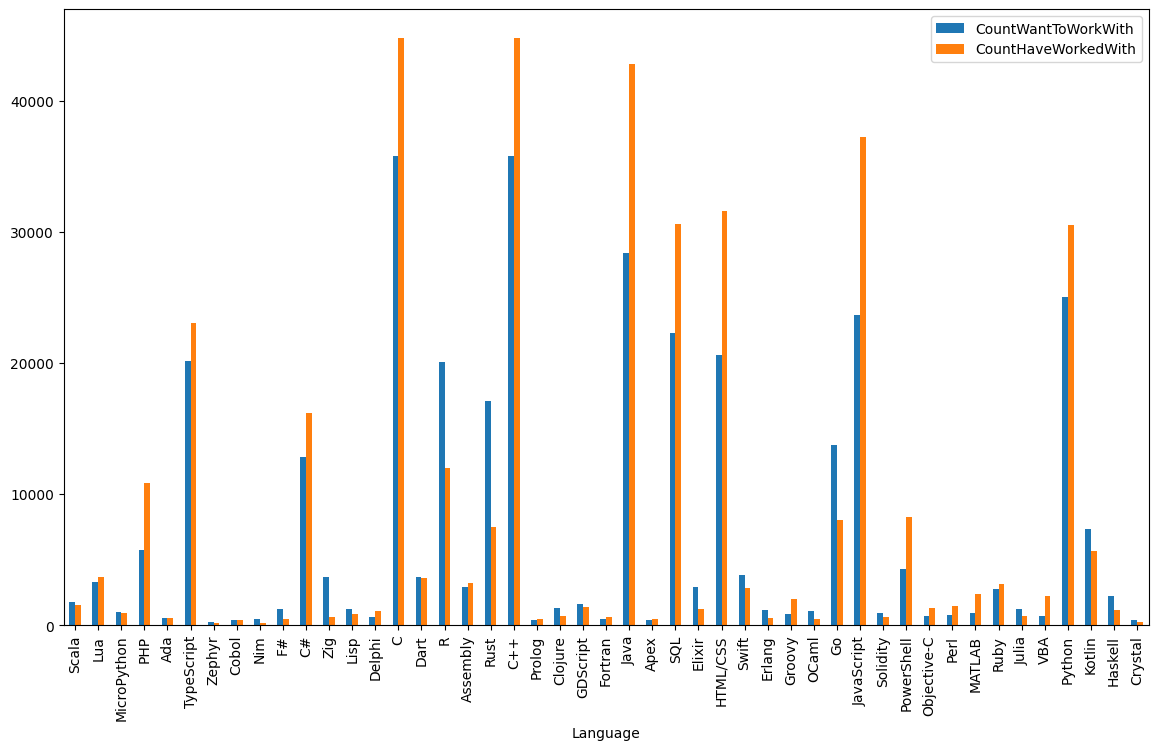

In [41]:
df_lang.plot(kind='bar', x='Language', y=['CountWantToWorkWith', 'CountHaveWorkedWith'], figsize=(14, 8))

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


Text(0.5, 1.0, 'Remote Work Distribution by Country')

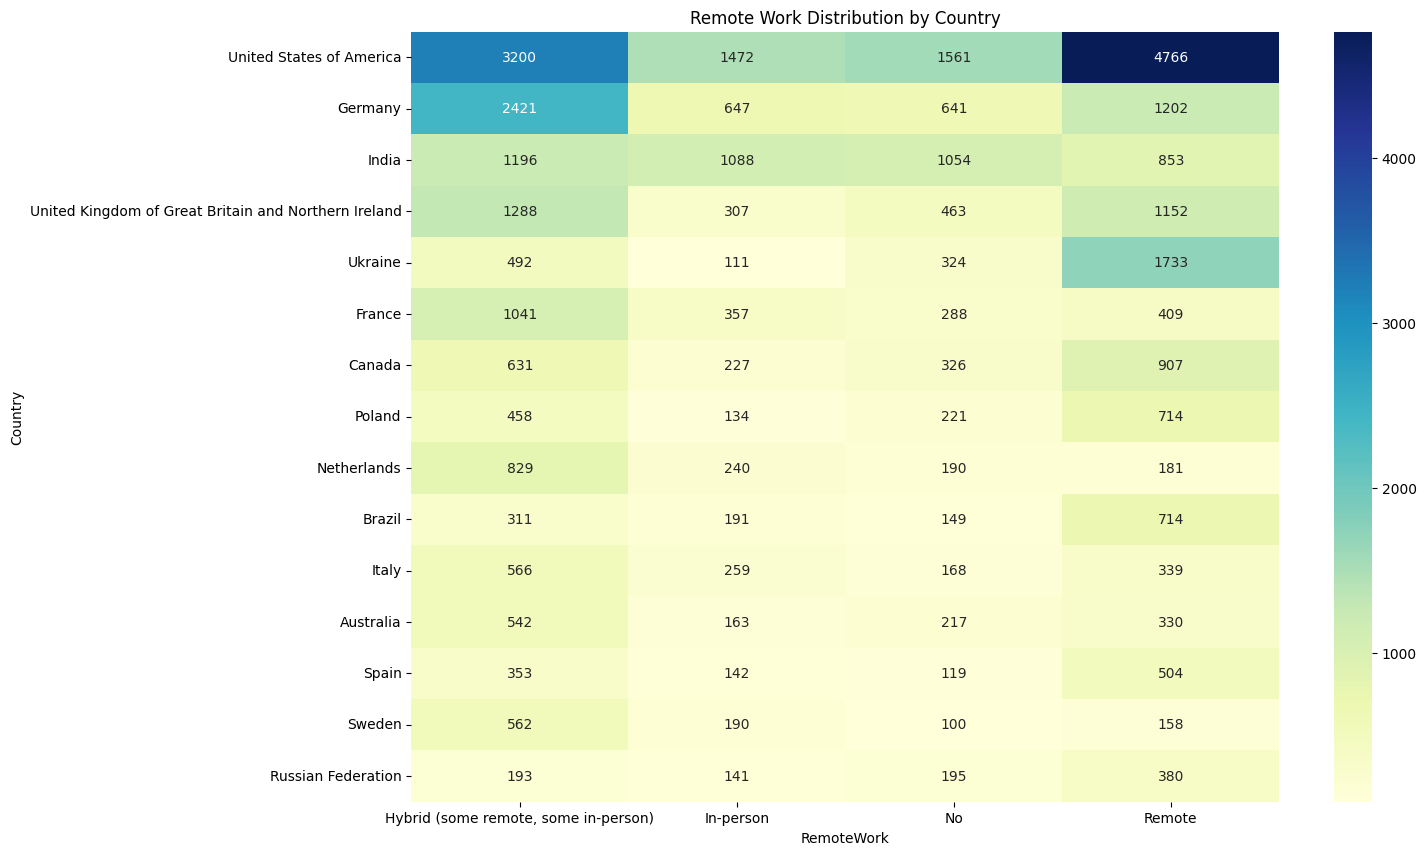

In [54]:
df_heatmap = df.groupby('Country')['RemoteWork'].value_counts().unstack()
df_heatmap_top_15 = df_heatmap.sum(axis=1).nlargest(15).index
plt.figure(figsize=(14, 10))
sns.heatmap(df_heatmap.loc[df_heatmap_top_15], cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Remote Work Distribution by Country')


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [55]:
## Write your code here
# - Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
# - Calculate the Pearson or Spearman correlation coefficient.

correlation_pearson = df['JobSat'].corr(df['YearsCodePro'], method='pearson')
correlation_spearman = df['JobSat'].corr(df['YearsCodePro'], method='spearman')

print(f"Pearson correlation between JobSat and YearsCodePro: {correlation_pearson:.4f}")
print(f"Spearman correlation between JobSat and YearsCodePro: {correlation_spearman:.4f}")


Pearson correlation between JobSat and YearsCodePro: 0.0706
Spearman correlation between JobSat and YearsCodePro: 0.0725


<Axes: xlabel='YearsCodePro', ylabel='JobSat'>

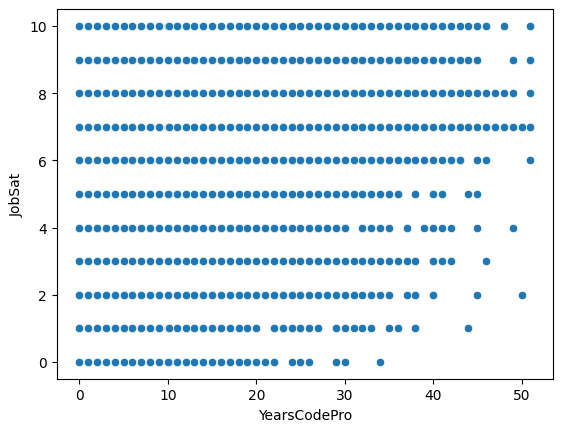

In [58]:
sns.scatterplot(data=df, x='YearsCodePro', y='JobSat')

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


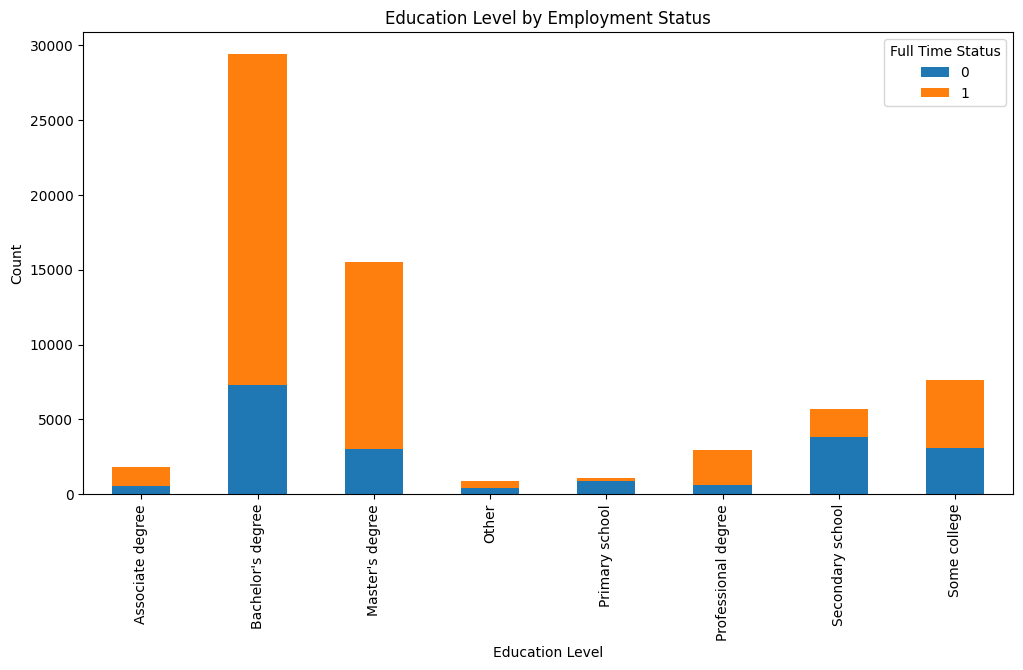

In [67]:
## Write your code here
# - Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

# - **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.
employment_cols = ['Is_Emp_student_full', 'Is_Emp_not_but_looking', 'Is_Emp_full_time', 
           'Is_Emp_retired', 
           'Is_Emp_not_and_not_looking', 
           'Is_Emp_part_time', 
           'Is_Emp_student_part', 
           'Is_Emp_independent']
crosstab = pd.crosstab( df['EdLevel'], df['Is_Emp_full_time'])
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Education Level by Employment Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Full Time Status', loc='upper right',  )
plt.show()



### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
output_filename = 'survey_data_cleaned_analyzed_v2.csv'
df.to_csv(output_filename, index=False)
print(f"Dataset saved as '{output_filename}'")

# Print summary of the final dataset
print(f"\nFinal dataset summary:")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"Missing values per column:")
print(df.isnull().sum().sum()/len(df.columns))

print(f"\nDataset successfully saved and ready for further analysis!")

Dataset saved as 'survey_data_cleaned_analyzed_v2.csv'

Final dataset summary:
Shape: (64891, 155)
Columns: 155
Missing values per column:
2392853

Dataset successfully saved and ready for further analysis!


In [69]:
print(df.isnull().sum().sum()/len(df.columns))

15437.76129032258


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
